In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [7]:
X1 = df[['PM1y1', 'PM1y2', 'PM1y3','year', 'month', 'day']]
Y1 = df['PM1']

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=4)

In [22]:
grad_boost = GradientBoostingRegressor(n_estimators=2500,
                                      max_depth=8,
                                      max_features=0.25,
                                      min_samples_split=4,
                                      min_samples_leaf=6,
                                      learning_rate=0.001)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.001, max_depth=8, max_features=0.25,
                          min_samples_leaf=6, min_samples_split=4,
                          n_estimators=2500)

In [23]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.8584370491654519

Score on test data: 0.7198635152196273

Root Mean Squared Error: 60.24285854549239

Overall model accuracy: 0.7198635152196273


In [24]:
test=data.loc['207':'259']
X=test[['PM1y1', 'PM1y2', 'PM1y3','year', 'month', 'day']]
X

,PM1y1,PM1y2,PM1y3,year,month,day
207,428.861429,371.975714,416.398571,2019,12,29
208,456.537143,452.655714,332.717143,2020,1,5
209,349.680000,344.172857,282.434286,2020,1,12
210,405.144286,405.398571,346.604286,2020,1,19
211,223.215604,302.185714,237.858571,2020,1,26
212,225.330769,284.925714,251.350000,2020,2,2
213,198.920769,331.052857,328.171429,2020,2,9
214,333.581429,204.577143,279.338571,2020,2,16
215,192.155714,330.682857,275.608571,2020,2,23
216,172.547857,228.510000,280.377143,2020,3,1


In [25]:
predict=grad_boost.predict(X)

In [26]:
predict

array([322.05640834, 333.24676665, 329.41545046, 337.35195485,
       268.911858  , 225.81847745, 282.18128264, 248.62626103,
       282.48798557, 226.42490111, 239.54547932, 223.77826295,
       243.83848799, 255.10428331, 226.84498079, 216.28539348,
       269.78121155, 238.13108845, 199.91396562, 263.84236429,
       261.00988789, 250.1682419 , 230.38117722, 206.15452722,
       249.56143955, 248.039139  , 184.76730952, 172.87678388,
       178.62229817, 122.4143672 , 105.85391892, 169.64566666,
       150.54402441, 126.64729568, 122.80083002, 114.19919167,
       148.13190763, 138.69142432, 143.64919802, 131.32838335,
       190.01922372, 252.73463172, 288.85136829, 288.40326047,
       272.60793878, 313.6489428 , 318.17942708, 267.76972507,
       276.86909909, 373.11678685, 281.68039907, 306.61225682,
       310.74327279])

In [27]:
dates=data.loc['207':'259','From Date']

In [28]:
X['From Date']=dates.values

In [29]:
X.columns

Index(['PM1y1', 'PM1y2', 'PM1y3', 'year', 'month', 'day', 'From Date'], dtype='object')

In [30]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [31]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [32]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [33]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

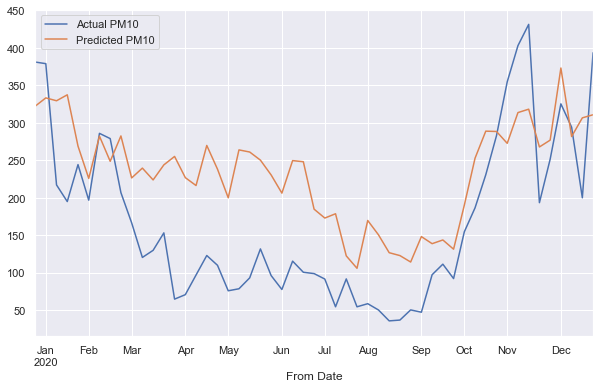

In [34]:
test['PM1'].plot(legend=True, label='Actual PM10', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted PM10')

In [35]:
np.sqrt(mean_squared_error(test['PM1'],X['pred']))

98.4629393570046

In [36]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 48.05725427949885
MSE: 3629.2020057322056
RMSE: 60.24285854549239
R-Squared: 0.7198635152196273


In [37]:
mae = metrics.mean_absolute_error(test['PM1'],X['pred'])
mse = metrics.mean_squared_error(test['PM1'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['PM1'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 86.94323900710104
MSE: 9694.950426821166
RMSE: 98.4629393570046
R-Squared: 0.18241150758044455


In [38]:
import pickle
filename = 'PM10_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [39]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.7198635152196273


# 3rd plot

In [40]:
testcase = pd.DataFrame()

In [41]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [42]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [43]:
testcase

,test,pred,Corrected
33,103.254286,115.582004,55.339145
176,167.354286,236.429518,176.186659
105,344.172857,354.164884,293.922025
18,267.381786,335.345432,275.102573
90,127.725714,129.884482,69.641623
1,497.675714,391.851576,452.094435
187,61.948571,172.921449,112.678590
89,138.811429,163.031641,102.788783
191,112.964286,132.208521,71.965662
81,81.110000,131.256717,71.013859


In [44]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [45]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8812346633702672

In [46]:
test2020=pd.DataFrame()

In [47]:
test2020['test']=test['PM1']
test2020['pred']=X['pred']

In [48]:
test2020.index=test.index

In [49]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

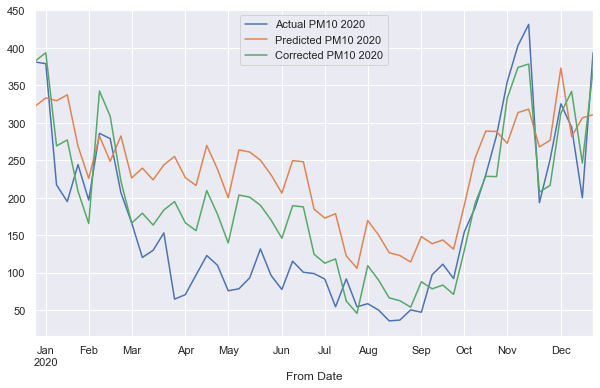

In [50]:
test2020['test'].plot(legend=True, label='Actual PM10 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted PM10 2020')
test2020["Corrected"].plot(legend=True, label='Corrected PM10 2020')

In [51]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.6842064223646711